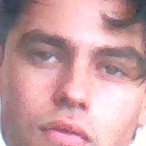

[INFO] Saved face image 10 of 10
[INFO] ✅ Finished capturing for Felix Mallard.

[INFO] All student face images captured.


In [7]:
import cv2
import os
from IPython.display import display, clear_output
from PIL import Image

# Load Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Configuration
num_students = 3
images_per_student = 10
dataset_path = 'dataset'
os.makedirs(dataset_path, exist_ok=True)

# Start webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("[ERROR] Could not open webcam.")
else:
    print("[INFO] Webcam started.")

# Loop for each student
for student_num in range(num_students):
    name = input(f"\nEnter name for Student {student_num + 1}: ").strip()
    student_folder = os.path.join(dataset_path, name)
    os.makedirs(student_folder, exist_ok=True)

    print(f"[INFO] Capturing face images for {name}...")

    img_count = 0
    while img_count < images_per_student:
        ret, frame = cap.read()
        if not ret:
            print("[ERROR] Failed to grab frame.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_roi = frame[y:y+h, x:x+w]
            face_rgb = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
            face_image = Image.fromarray(face_rgb)

            # Display face in notebook
            clear_output(wait=True)
            display(face_image)

            # Save cropped face
            img_path = os.path.join(student_folder, f"{img_count + 1}.jpg")
            cv2.imwrite(img_path, face_roi)
            print(f"[INFO] Saved face image {img_count + 1} of {images_per_student}")
            img_count += 1
            break  # Save only one face per frame

    print(f"[INFO] ✅ Finished capturing for {name}.")

cap.release()
print("\n[INFO] All student face images captured.")
